In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [17]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    
    print("Number of samples in total: ", y.shape[0])
    print("Number of folds: ",k_fold, " of", interval, "samples.")
    return np.array(k_indices)

In [24]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    # get k'th subgroup in test, others in train
    x_te = x[k_indices[k,:]]
    y_te = y[k_indices[k,:]]
    x_tr = x[np.union1d(k_indices[:k,:], k_indices[k+1:,:])]
    y_tr = y[np.union1d(k_indices[:k,:], k_indices[k+1:,:])]

    # build data with polynomial degree
    phi_te = build_poly(x_te, degree)
    phi_tr = build_poly(x_tr, degree)
        
    # ridge regression
    w_tr = ridge_regression(y_tr, phi_tr, lambda_)
    
    # calculate the loss for train and test data
    rmse_tr = np.sqrt(2*compute_mse(y_tr, phi_tr, w_tr))
    rmse_te = np.sqrt(2*compute_mse(y_te, phi_te, w_tr))
    
    #print("Training rmse: ", rmse_tr)
    #print("Tested rmse: ", rmse_te)

    return rmse_tr, rmse_te
    raise NotImplementedError

In [48]:
seed = 1
degree = 5
k_fold = 4
k=2
lambda_ = 0.1

k_indices = build_k_indices(y, k_fold, seed)
cross_validation(y, x, k_indices, k, lambda_, degree)


Number of samples in total:  50
Number of folds:  4  of 12 samples.


(0.24762195018220401, 0.30323921409183796)

# Lambda optimization (given a fixed degree)

In [37]:
from plots import cross_validation_visualization

def cross_validation_lambda(degree, lambda_min, lambda_max, k_fold):
    
    # tested lambdas
    lambdas = np.logspace(lambda_min, lambda_max, 30)
    
    # split data in k fold
    seed = 1
    k_indices = build_k_indices(y, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
 
    for  lambda_ in lambdas:

        rmse_tr_all = []
        rmse_te_all = []
            
        for k in range(k_fold):        
        
            # compute losses for the k'th fold
            rmse_tr_tmp, rmse_te_tmp = cross_validation(y, x, k_indices, k, lambda_, degree)

            # store losses 
            rmse_tr_all.append(rmse_tr_tmp)
            rmse_te_all.append(rmse_te_tmp)
        
        # store mean losses
        rmse_tr.append(np.mean(rmse_tr_all))
        rmse_te.append(np.mean(rmse_te_all))
    
    # extract the optimal value for lambda
    lambda_opt = lambdas[rmse_te.index(min(rmse_te))]
    
    # plot the training and testing errors for the different values of lambda
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
    return lambda_opt

Number of samples in total:  50
Number of folds:  4  of 12 samples.
Optimal lambda:  2.21221629107


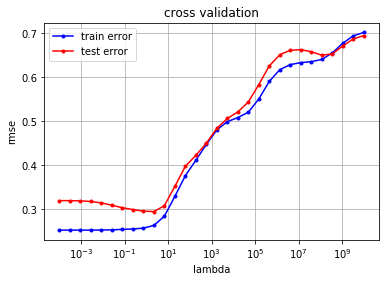

In [49]:
# fixed hyper-parameters
degree = 5
lambda_min = -4
lambda_max = 10
k_fold = 4

# optimize the value of lambda given its range and the fixed hyper-parameters
lambda_opt = cross_validation_lambda(degree, lambda_min, lambda_max, k_fold)

print("Optimal lambda: ", lambda_opt)

# Degree optimization

In [40]:
from plots import cross_validation_visualization

def cross_validation_degree(lambda_, degree_min, degree_max, k_fold):
    
    # tested degrees
    degrees = np.arange(degree_min, degree_max+1)
    
    # split data in k fold
    seed = 1
    k_indices = build_k_indices(y, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
 
    for  degree in degrees:

        rmse_tr_all = []
        rmse_te_all = []
            
        for k in range(k_fold):        
        
            # compute losses for the k'th fold
            rmse_tr_tmp, rmse_te_tmp = cross_validation(y, x, k_indices, k, lambda_, degree)

            # store losses 
            rmse_tr_all.append(rmse_tr_tmp)
            rmse_te_all.append(rmse_te_tmp)
        
        # store mean losses
        rmse_tr.append(np.mean(rmse_tr_all))
        rmse_te.append(np.mean(rmse_te_all))
    
    # extract the optimal degree between 'degree_min' and 'degree_max'
    degree_opt = degrees[rmse_te.index(min(rmse_te))]
    
    # plot the training and testing errors for the different degrees
    cross_validation_visualization(degrees, rmse_tr, rmse_te)
    
    return degree_opt

Number of samples in total:  50
Number of folds:  4  of 12 samples.
Optimal degree:  7


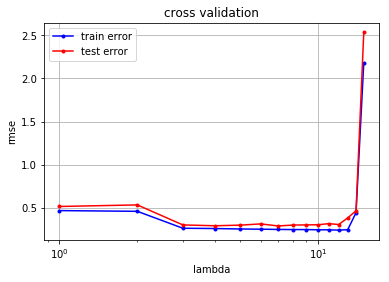

In [47]:
# fixed hyper-parameters
lambda_ = 0.2
degree_min = 1
degree_max = 15
k_fold = 4

# optimize degree given its range and the fixed hyper-parameters
degree_opt = cross_validation_degree(lambda_, degree_min, degree_max, k_fold)

print("Optimal degree: ", degree_opt)

# Variance of RMSE 

In [81]:
from plots import cross_validation_visualization

def cross_validation_var_rmse(lambda_, degree, k_fold):
    
    # split data in k fold
    seed = 1
    k_indices = build_k_indices(y, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr_all = []
    rmse_te_all = []
         
    for k in range(k_fold):        
        
        # compute losses for the k'th fold
        rmse_tr_tmp, rmse_te_tmp = cross_validation(y, x, k_indices, k, lambda_, degree)

        # store losses 
        rmse_tr_all.append(rmse_tr_tmp)
        rmse_te_all.append(rmse_te_tmp)
        
    # store mean losses
    std_rmse_tr = np.std(rmse_tr_all)
    std_rmse_te = np.std(rmse_te_all)
    
    # boxplot of the training and testing rmse
    plt.figure()
    plt.boxplot(np.column_stack((np.array(rmse_tr_all), np.array(rmse_te_all))), labels=['training rmse','testing rmse'])
    
    return std_rmse_tr, std_rmse_te

Number of samples in total:  50
Number of folds:  5  of 10 samples.
Variance rmse for training:  0.000121958622387
Variance rmse for testing:  0.00269475709836


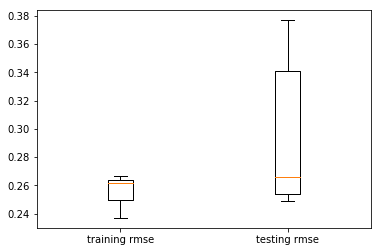

In [85]:
# fixed hyper-parameters
lambda_ = 2
degree = 5
k_fold = 5

# estimate the training and testing rmse variances 
std_rmse_tr, std_rmse_te = cross_validation_var_rmse(lambda_, degree, k_fold)

print("Variance rmse for training: ", std_rmse_tr**2)
print("Variance rmse for testing: ", std_rmse_te**2)

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

sum of the training error variances over the degree:  2.85410008347e-05
sum of the testing error variances over the degree:  0.000122260504197


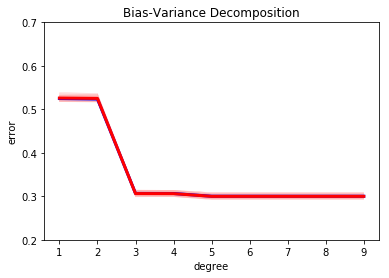

In [144]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    
    # define parameters
    seeds = range(100)
    num_data = 1000
    ratio_train = 0.005
    degrees = range(1, 10)
    ratio = 0.8
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        
        # set the seed
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        # split data with a specific seed
        x_tr, y_tr, x_te, y_te = split_data(x, y, ratio)

        # bias_variance_decomposition
        
        for index_degree, degree in enumerate(degrees):
            
            # build data with polynomial degree
            phi_te = build_poly(x_te, degree)
            phi_tr = build_poly(x_tr, degree)
        
            # regression
            w = least_squares(y_tr, phi_tr)
            #lambda_ =0.1
            #w = ridge_regression(y_tr, phi_tr,lambda_)
    
            # calculate the loss for train and test data
            rmse_tr_tmp = np.sqrt(2*compute_mse(y_tr, phi_tr, w))
            rmse_te_tmp = np.sqrt(2*compute_mse(y_te, phi_te, w))
            
            # store losses
            rmse_tr[index_seed, index_degree] = rmse_tr_tmp
            rmse_te[index_seed, index_degree] = rmse_te_tmp

    # variance of the errors
    var_rmse_tr = np.std(rmse_tr, axis=0)**2
    var_rmse_te = np.std(rmse_te, axis=0)**2
    print("sum of the training error variances over the degree: ", sum(var_rmse_tr))
    print("sum of the testing error variances over the degree: ", sum(var_rmse_te))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

Given a certain degree, the variance of the different test errors (regression on different training and tested sets) decrease with the number of data. It goes directly from the Chebychev inequality seen in the lecture. 

#### Conclusion: 
Ridge regression avoids over fitting when the number of samples is high, leading to a less testing error variance than which computed with least squared.
This is less true when the number of data increase: least square and ridge regression lead to the same testing error variances. 

In [120]:
a= np.empty((2, 3))
a[1,1]= 1
print(a)
print(np.std(a, axis=0))

[[ 0.2  0.3  0.4]
 [ 0.5  1.   0.7]]
[ 0.15  0.35  0.15]
